# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

### Sinh viên không được phép sử dụng internet
### Sinh viên sau khi làm bài xong xuất ra file PDF đồng thời nộp lên Fit-lab và push lên git-hub
### Sinh viên làm bắt đầu làm bài từ 15h40 - 18h00

In [1478]:
# Họ và Tên: Nguyễn Minh Huy
# MSSV: 2174802010934

In [1479]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [1480]:
# Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    # Loại bỏ các mẫu thuộc lớp 2
    X = X[y != 2]
    y = y[y != 2]
    return X, y

# Điền ở đây
X, y = load_dataset()
print("X:", X.shape)
print("y:", y.shape)

X: (100, 4)
y: (100,)


Kết quả: (100, 4) (100,)

Kết quả: (100, 4) (100,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


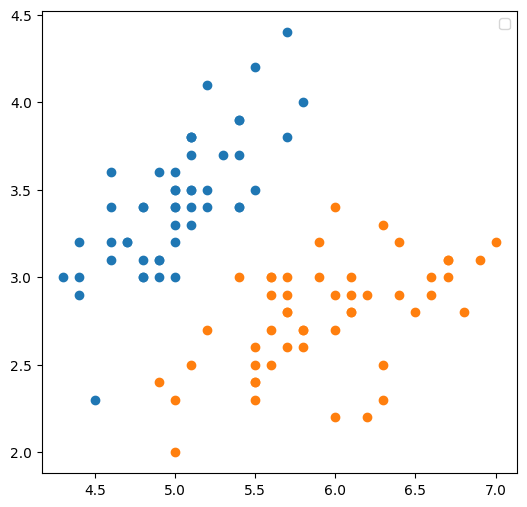

In [1481]:
# Trực quan hóa dữ liệu
def visualize_data(X, y):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],)
    plt.legend()
    plt.show()
visualize_data(X, y)



Kết quả

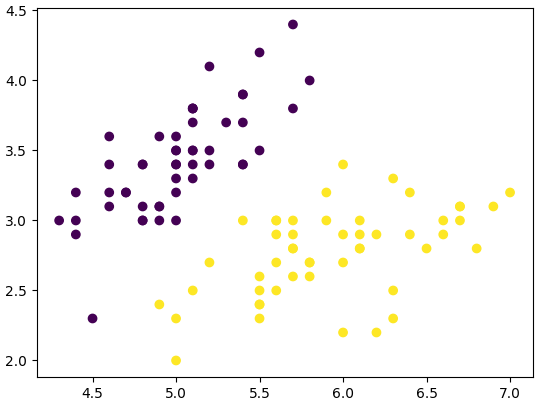

In [1482]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        # Tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
        self.linear = nn.Linear(n_features, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

LogisticRegressTorch(n_features=4)


LogisticRegressTorch(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)

In [1483]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    
    def __len__(self):
        return len(self.X)  # Trả về số lượng mẫu trong tập dữ liệu
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]  # Trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [1484]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

print(f"Số lượng mẫu trong tập dữ liệu: {len(dataset)}")
print("Một mẫu dữ liệu:", dataset[0])

Số lượng mẫu trong tập dữ liệu: 100
Một mẫu dữ liệu: (tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor([0.]))


In [1485]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70/30.
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)  # 70%
test_size = dataset_size - train_size  # Còn lại là 30%

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])



In [1486]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1487]:

# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features=n_features)
criterion = nn.BCELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.05)  



In [1488]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    accuracy = correct / total
    test_accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 1.0758, Test Loss: 0.9427, Test Accuracy: 0.4333
Epoch 2/200, Train Loss: 0.8932, Test Loss: 0.7720, Test Accuracy: 0.3333
Epoch 3/200, Train Loss: 0.7889, Test Loss: 0.7081, Test Accuracy: 0.5667
Epoch 4/200, Train Loss: 0.7626, Test Loss: 0.7034, Test Accuracy: 0.4333
Epoch 5/200, Train Loss: 0.6853, Test Loss: 0.6187, Test Accuracy: 0.5667
Epoch 6/200, Train Loss: 0.6639, Test Loss: 0.6103, Test Accuracy: 0.5667
Epoch 7/200, Train Loss: 0.6751, Test Loss: 0.5510, Test Accuracy: 0.9000
Epoch 8/200, Train Loss: 0.5643, Test Loss: 0.5180, Test Accuracy: 0.5667
Epoch 9/200, Train Loss: 0.5477, Test Loss: 0.4916, Test Accuracy: 0.6333
Epoch 10/200, Train Loss: 0.5165, Test Loss: 0.4692, Test Accuracy: 1.0000
Epoch 11/200, Train Loss: 0.4706, Test Loss: 0.4490, Test Accuracy: 1.0000
Epoch 12/200, Train Loss: 0.4441, Test Loss: 0.4278, Test Accuracy: 1.0000
Epoch 13/200, Train Loss: 0.4213, Test Loss: 0.4668, Test Accuracy: 0.9667
Epoch 14/200, Train Loss: 0.4218, 

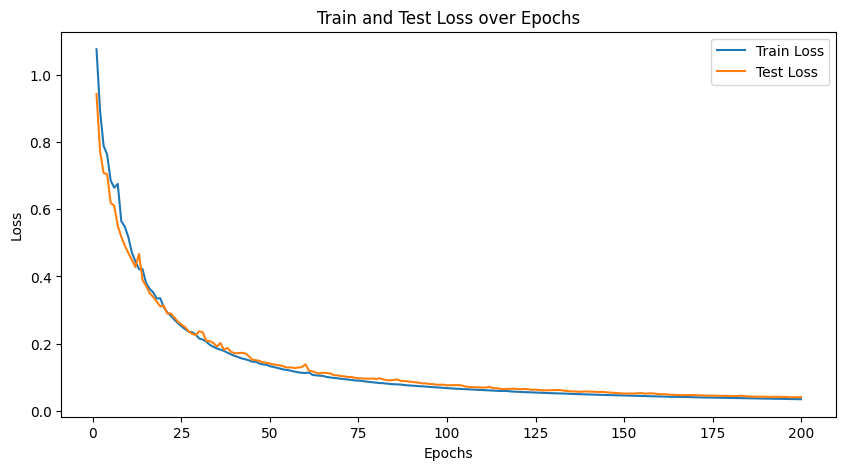

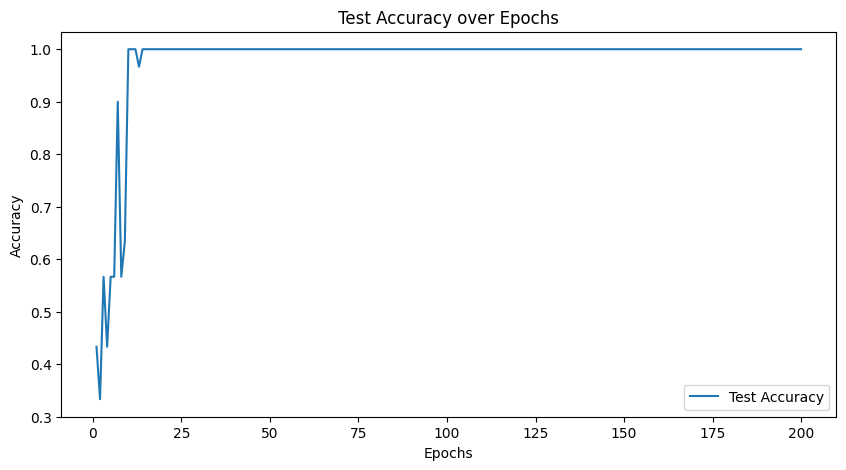

In [1489]:
# Vẽ đồ thị Train Loss và Test Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss over Epochs')
plt.show()

import matplotlib.pyplot as plt


# Vẽ đồ thị Test Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy over Epochs')
plt.show()



#Kết quả:

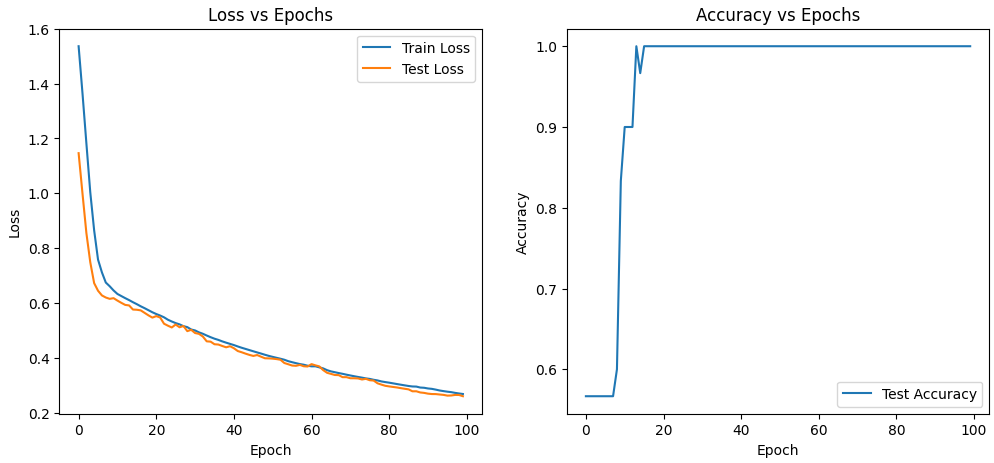